**NETTOYAGE DU DATASET**

In [28]:
#Import du dataset et premier aperçu
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
datajob = pd.read_csv(r"C:\Users\Zakar\Desktop\Project A\kaggle_survey_2020_responses.csv", low_memory = False)
datajob.head()


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Dimension de notre dataset 
datajob.shape

(20037, 355)

In [30]:
#Supression des doublons
datajob = datajob.drop_duplicates(keep = 'first')

#Vérification
print(datajob.duplicated().sum())

0


In [31]:
#On remarque que les personnes ayant un temps de complétion du questionnaire très faible (moins d'une minute) n'ont en fait rempli
#que les 3 premières colonnes : âge, sexe, pays puis ont abandonné le questionnaire. 
#On va donc retirer du dataset tous les abandons 
abandons = datajob[['Q1', 'Q2', 'Q3']].notna().all(axis = 1) & datajob.loc[:,'Q4':].isna().all(axis = 1)
datajob = datajob[~abandons]

In [32]:
#Suppression des lignes et colonnes inutiles pour la suite de notre analyse : 
#ici la ligne d'index 1 car il s'agit du détail des questions
#ainsi que la colonne 'Time from Start to Finish (seconds)' car l'information du temps de complétion nous est inutile 
datajob = datajob.drop(index = 0)
datajob = datajob.drop('Time from Start to Finish (seconds)', axis = 1)

datajob.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Suppression des colonnes composées uniquement de NaN
datajob = datajob.dropna(axis = 1, how = 'all')

#Vérification 
datajob.shape

(19566, 332)

In [34]:
#Transformation des valeurs par 1 et des NaN par 0 pour les colonnes concernant les questions à choix multiples
#Sélection des colonnes :
colonnes_QCM = [col for col in datajob.columns if ('part' in col.lower() or 'other' in col.lower())]
len(colonnes_QCM)

#Transformation des valeurs : 
datajob[colonnes_QCM] = datajob[colonnes_QCM].notna().astype(int)

#Vérification :
datajob.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_OTHER
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Traitement des valeurs manquantes restantes
datajob.isna().sum()[datajob.isna().sum() > 0]

Q5       289
Q6       446
Q8      1826
Q11     2829
Q13     2786
Q15     3192
Q20     8163
Q21     8284
Q22     8436
Q24     8837
Q25     8996
Q30    16053
Q32    18068
Q38     6276
dtype: int64

In [36]:
#La première chose que l'on remarque est que les colonnes Q30 et Q32 ont un volume très élevé de valeurs manquantes par rapport aux autres
#respectivement 82% et 92% de NaN. 
#Idem pour la question 32 et 31. Ils ne sont pas intéressants pour l'étude, on peut donc les supprimer
datajob.drop(["Q30", "Q32"], axis=1, inplace=True)

In [37]:
#On s'intéresse ensuite à la colonne Q4 (What is the highest level of formal education that you have attained or plan to attain 
#within the next 2 years?)
datajob['Q4'].value_counts()

#Parmi les 7 réponses proposées dans le questionnaire, celle qui nous intéresse est "I prefer not to answer"
#Nous pouvons supposer que les participants n'ayant pas répondu à cette question ne souhaitaient pas mentionner leur diplôme
#De ce fait, nous pouvons remplacer les valeurs manquantes par cette réponse
datajob['Q4'].fillna('I prefer not to answer', inplace = True)


In [38]:
#On s'intéresse ensuite aux colonnes Q5, Q8, Q11, Q22 et Q38 qui sont des colonnes à choix uniques
#On va donc remplacer leurs valeurs manquantes par leur valeur modale
colonnes_choix_unique = ['Q5', 'Q8', 'Q11', 'Q22', 'Q38']

for col in colonnes_choix_unique:
    valeur_modale = datajob[col].mode()[0]
    datajob[col] = datajob[col].fillna(valeur_modale) 
#Vérification
datajob.isna().sum()[datajob.isna().sum() > 0]

Q6      446
Q13    2786
Q15    3192
Q20    8163
Q21    8284
Q24    8837
Q25    8996
dtype: int64

In [39]:
#Les questions Q6, Q13, Q15, Q20, Q21 et Q25 sont plus complexes car ce sont des questions ordinales. 
#Les données de ces colonnes ne peuvent pas être exploitées pour faire des statistiques (par exemple) 
#car elles sont sous type 'chaîne de caractères'. En plus de remplacer leurs valeurs manquantes par leur valeur modale, 
#on va également transformer les réponses en valeurs numériques puis s'assurer qu'elles soient sous le bon format 'type'
    
datajob['Q6'] = datajob['Q6'].replace({
    'I have never written code': 0,
    '< 1 years': 1,
    '1-2 years': 2,
    '3-5 years': 3,
    '5-10 years': 4,
    '10-20 years': 5,
    '20+ years': 6
})


datajob['Q13'] = datajob['Q13'].replace({
    'Never': 0,
    'Once': 1,
    '2-5 times': 2,
    '6-25 times': 3,
    'More than 25 times': 4
})


datajob['Q15'] = datajob['Q15'].replace({
    'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5,
    '5-10 years': 6,
    '10-20 years': 7,
    '20 or more years': 8
})


datajob['Q20'] = datajob['Q20'].replace({
    '0-49 employees': 0,
    '50-249 employees': 1,
    '250-999 employees': 2,
    '1000-9,999 employees': 3,
    '10,000 or more employees': 4
})


datajob['Q21'] = datajob['Q21'].replace({
    '0': 0,
    '1-2': 1,
    '3-4': 2,
    '5-9': 3,
    '10-14': 4,
    '15-19': 5,
    '20+': 6
})


datajob['Q25'] = datajob['Q25'].replace({
    '$0 ($USD)': 0,
    '$1-$99': 1,
    '$100-$999': 2,
    '$1000-$9,999': 3,
    '$10,000-$99,999': 4,
    '$100,000 or more ($USD)': 5
})


colonnes_ordinales = ['Q6', 'Q13', 'Q15', 'Q20', 'Q21', 'Q25']
for col in colonnes_ordinales :
    valeur_modale = datajob[col].mode()[0]
    datajob[col] = datajob[col].fillna(valeur_modale) 

#Changement du type 'float' à 'int' 
for col in colonnes_ordinales:
    datajob[col] = datajob[col].astype('int')

#Vérification
datajob.isna().sum()[datajob.isna().sum() > 0]
datajob[['Q6', 'Q13', 'Q15', 'Q20', 'Q21', 'Q25']].dtypes

Q6     int64
Q13    int64
Q15    int64
Q20    int64
Q21    int64
Q25    int64
dtype: object

In [40]:
#Il nous reste donc que la colonne Q24 à traiter : 'What is your current yearly compensation ( approximate $USD )?'
#Cette colonne est particulièrement importante pour nos analyses car ses données nous aideront à résoudre une partie de nos problématiques.
#Nous devons de ce fait transformer les données en valeurs numériques. Les réponses proposées correspondent à une tranche de salaire.
#Nous allons donc attribuer à chaque tranche de salaire la valeur moyenne de la tranche. 
datajob['Q24'].value_counts()

datajob['Q24'] = datajob['Q24'].replace({
    '$0-999': 500,
    '1,000-1,999': 1500,
    '2,000-2,999': 2500,
    '3,000-3,999': 3500,
    '4,000-4,999': 4500,
    '5,000-7,499': 6250,
    '7,500-9,999': 8750,
    '10,000-14,999': 12500,
    '15,000-19,999': 17500,
    '20,000-24,999': 22500,
    '25,000-29,999': 27500,
    '30,000-39,999': 35000,
    '40,000-49,999': 45000,
    '50,000-59,999': 55000,
    '60,000-69,999': 65000,
    '70,000-79,999': 75000,
    '80,000-89,999': 85000,
    '90,000-99,999': 95000,
    '100,000-124,999': 112500,
    '125,000-149,999': 137500,
    '150,000-199,999': 175000,
    '200,000-249,999': 225000,
    '250,000-299,999': 275000,
    '300,000-500,000': 400000,
    '> $500,000': 500000
})

#Enfin, nous allons remplacer les valeurs manquantes de cette colonne par la moyenne de celle-ci
moyenne_salaire = datajob['Q24'].mean()
datajob['Q24'] = datajob['Q24'].fillna(moyenne_salaire)

#Changement du type 'float' à 'int' 
datajob['Q24'] = datajob['Q24'].astype('int')

#Vérification
datajob.isna().sum()

Q1              0
Q2              0
Q3              0
Q4              0
Q5              0
               ..
Q35_B_Part_6    0
Q35_B_Part_7    0
Q35_B_Part_8    0
Q35_B_Part_9    0
Q35_B_OTHER     0
Length: 330, dtype: int64

In [41]:
#Visualisation du dataset nettoyé 
datajob.head(12)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_OTHER
1,35-39,Man,Colombia,Doctoral degree,Student,4,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,30-34,Man,United States of America,Master’s degree,Data Engineer,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30-34,Man,United States of America,Master’s degree,Data Scientist,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,30-34,Man,Japan,Master’s degree,Software Engineer,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30-34,Man,India,Bachelor’s degree,Data Analyst,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22-24,Man,Brazil,Bachelor’s degree,Student,3,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
8,25-29,Woman,China,Master’s degree,Student,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,35-39,Man,Germany,Doctoral degree,Data Scientist,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,22-24,Man,China,No formal education past high school,Student,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
datajob.to_csv("Dataset_nettoye_VF.csv", index=False)


**DATA VISUALIZATION**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
plt.rcParams['axes.axisbelow'] = True

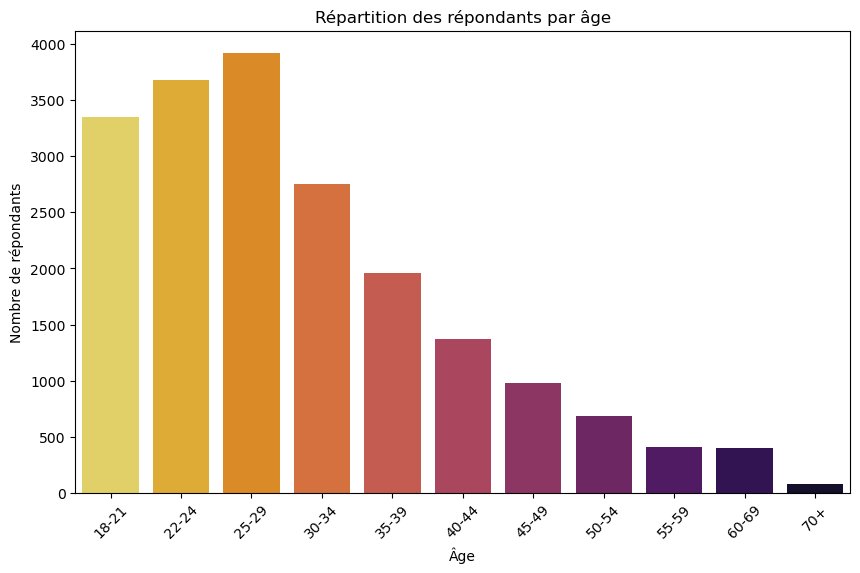

In [45]:
#Répartition par âge 
ordre_age = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
plt.figure(figsize = (10,6))
sns.countplot(x = 'Q1', order = ordre_age, palette = 'inferno_r', data = datajob)
plt.title("Répartition des répondants par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre de répondants")
plt.xticks(rotation = 45)
plt.show()

Q2
Man       15443
Woman      3764
Autres      359
Name: count, dtype: int64


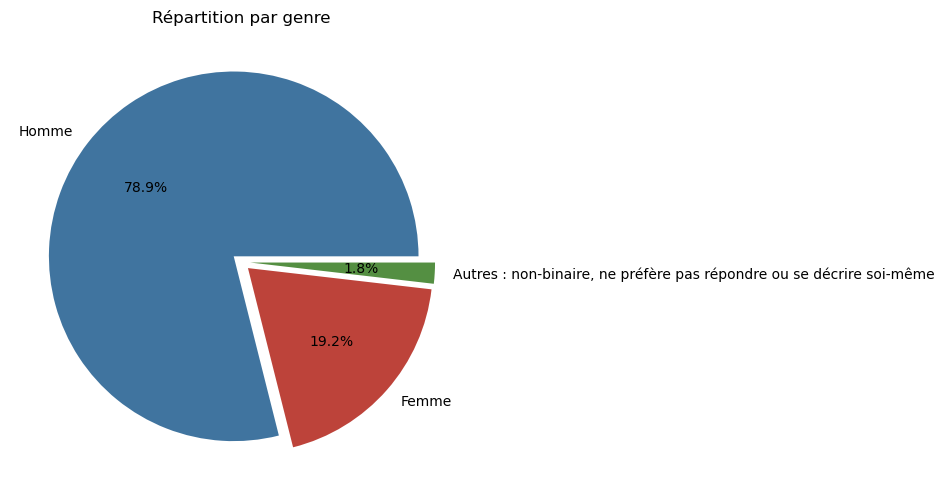

In [46]:
#Répartition par genre 

counts = datajob['Q2'].value_counts()
total = counts.sum()
valeurs_apparentes = counts[counts / total * 100 >= 1.8]
valeurs_non_apparentes = counts[counts / total * 100 < 1.8]

if valeurs_non_apparentes.sum() > 0 :
    valeurs_apparentes.loc['Autres'] = valeurs_non_apparentes.sum()

print(valeurs_apparentes)
labels = 'Homme', 'Femme', 'Autres : non-binaire, ne préfère pas répondre ou se décrire soi-même'

plt.figure(figsize = (6, 6))
plt.pie(valeurs_apparentes, labels = labels, colors = ['#40749f', '#bd433a', '#548f42'], autopct='%1.1f%%', explode=(0.05, 0.05, 0.05))
plt.title("Répartition par genre")
plt.show()

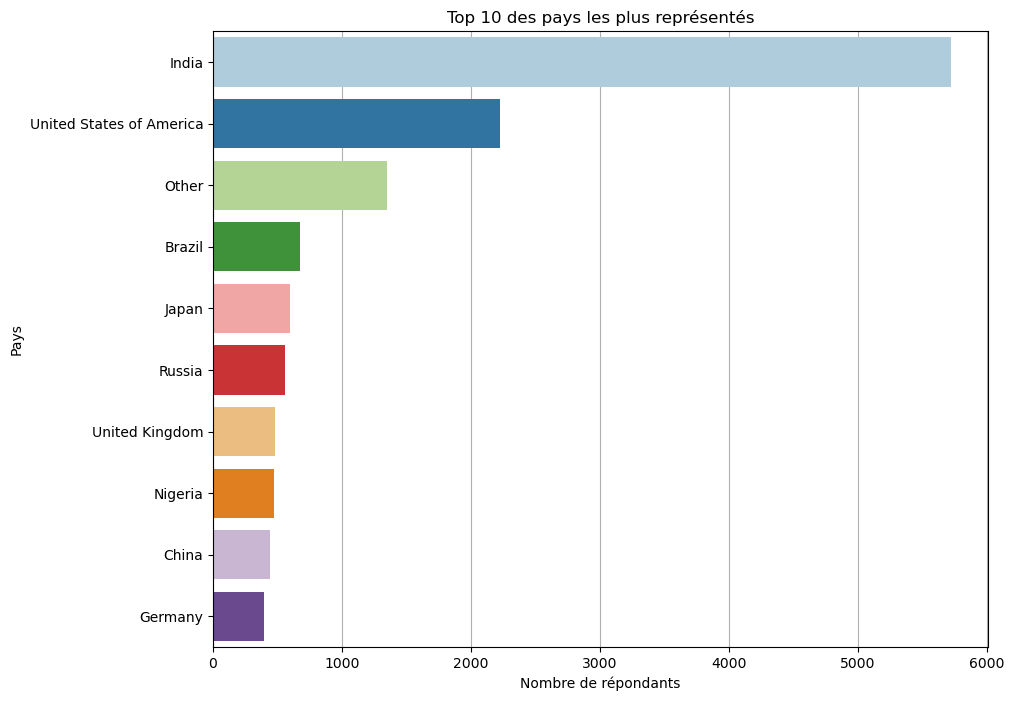

In [47]:
#Répartition géographique 
datajob['Q3'] = datajob['Q3'].replace(
    'United Kingdom of Great Britain and Northern Ireland',
    'United Kingdom')
plt.figure(figsize=(10,8))
plt.grid(True)
top_pays = datajob['Q3'].value_counts().head(10)
sns.barplot(x = top_pays.values, y = top_pays.index, palette = 'Paired')
plt.title("Top 10 des pays les plus représentés")
plt.xlabel("Nombre de répondants")
plt.ylabel("Pays")
plt.show()

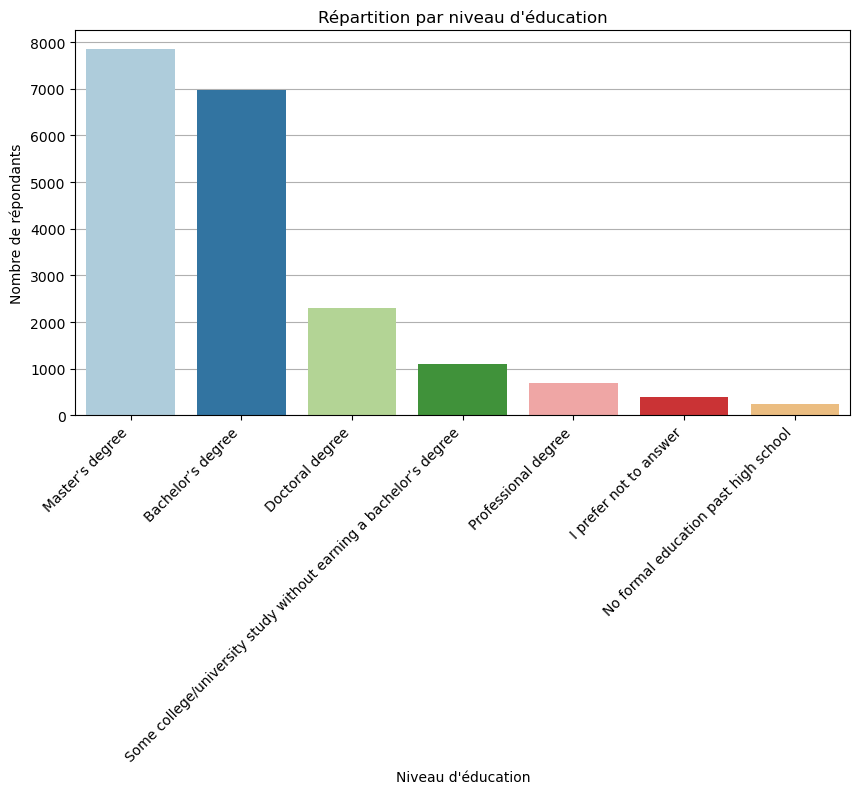

In [48]:
#Répartition par niveau d'éducation 
plt.figure(figsize=(10,5))
plt.grid(True)
sns.barplot(x = datajob['Q4'].value_counts().index, y = datajob['Q4'].value_counts().values, palette = 'Paired')
plt.title("Répartition par niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre de répondants")
plt.xticks(rotation=45, ha='right')
plt.show()

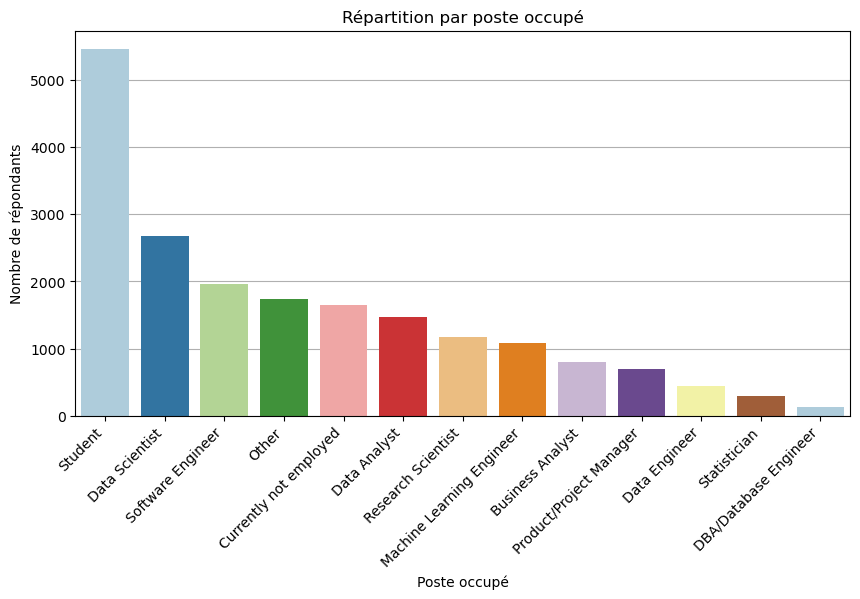

In [49]:
#Répartition par poste occupé 
plt.figure(figsize=(10,5))
plt.grid(True)
sns.barplot(x = datajob['Q5'].value_counts().index, y = datajob['Q5'].value_counts().values, palette = 'Paired')
plt.title("Répartition par poste occupé")
plt.xlabel("Poste occupé")
plt.ylabel("Nombre de répondants")
plt.xticks(rotation=45, ha='right')
plt.show()

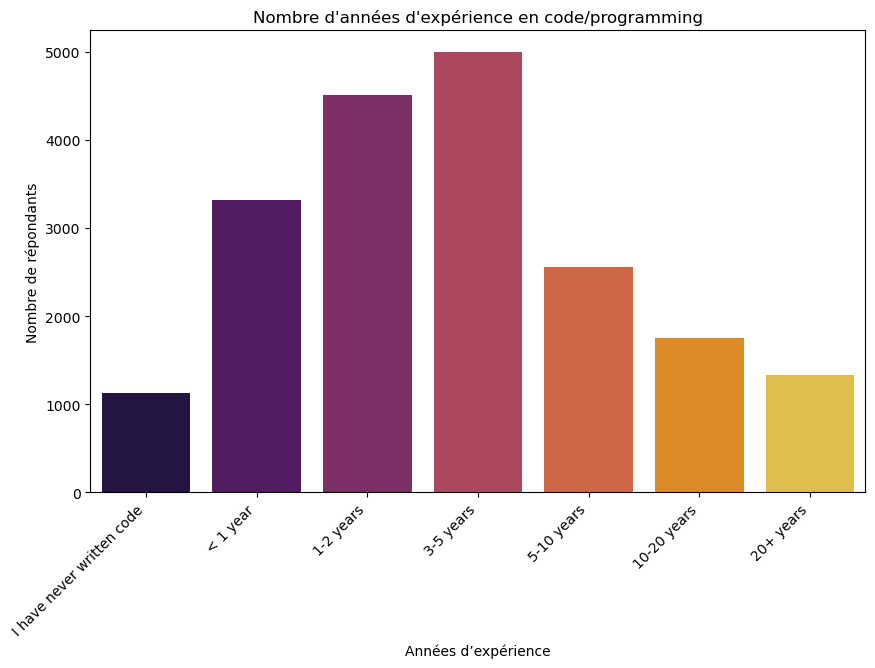

In [50]:
#Répartition par expérience 
labels_Q6 = {
    0: "I have never written code",
    1: "< 1 year",
    2: "1-2 years",
    3: "3-5 years",
    4: "5-10 years",
    5: "10-20 years",
    6: "20+ years"
}

plt.figure(figsize=(10,6))
sns.countplot(x = 'Q6', palette = 'inferno', data = datajob)
plt.title("Nombre d'années d'expérience en code/programming")
plt.xlabel("Années d’expérience")
plt.ylabel("Nombre de répondants")
plt.xticks(ticks = datajob['Q6'].value_counts().index,
           labels = [labels_Q6[i] for i in datajob['Q6'].value_counts().index],
           rotation=45, ha='right')
plt.show()